In [100]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Connect to the SQLite database
conn = sqlite3.connect(r'C:\Users\syeda\Desktop\de-ht-Imperial\data.db')



In [101]:
# Load the data from the 'motion' and 'homes' tables
df_motion = pd.read_sql_query("SELECT * FROM motion", conn)
df_homes = pd.read_sql_query("SELECT * FROM homes", conn)


In [102]:
print(df_motion)

                                      id                           home_id  \
0       e41218b439d933a1cd9ad158f78e9198  205c42ec747e2db13cb92087a99433f1   
1       92d48d869ae50b0764cfb8d70494f618  7d2f2e0a9e059b4fb8106bb0ad4b8a39   
2       65c18ba64884442dd47c2fd4cf3630e4  44a880cc6fc3a7db3464092f650ae7f1   
3       90d6336d189c929aa50fa08e5aee5f41  49b83fce41b676266b98cd1e095f1c11   
4       6e3d73bed24b95ffdfe5ec017787f039  14328a0b7574e912c2e23d62c9476a07   
...                                  ...                               ...   
580312  5ec75a93dcc136e6a4c7a4483d60b2ed  3a1f53e2e242bff03301a250135f894b   
580313  406c70038a540d29b1e68250d5ed341c  37b99328702f9fdc68c431a4ac450f2e   
580314  5168c52c3c022d747c81a6e6ce868e3f  3a1f53e2e242bff03301a250135f894b   
580315  40cad449e7cef4164b02672e8caff379  2b5ce37a65e82735416d69b987d99fe8   
580316  85cd6fe2cc3e585b17c4f7b9aaa4a439  37b99328702f9fdc68c431a4ac450f2e   

                      datetime   location  
0       2024-01-01 

In [103]:
print(df_homes)

                                   id  multiple_occupancy
0    dc922bd9bf8a2a9437642fe0dce9dcaa                   0
1    d40fc88629271da7b5833ed3f3222d17                   1
2    3fb064da180f02862063eca8e3b609c0                   1
3    16d71b9c46d9abd765bf395818efe527                   0
4    458264665736fd26184a8ea5641e6c48                   1
..                                ...                 ...
101  dbe580ed60d7c329931d98a0e2ad0ea3                   1
102  04a16138cd7e0fa768858ff7c02856d8                   1
103  62c8145530aca30cb0455dc386c0a9d6                   1
104  3a5cc5ac41ab3b18b63d6d8366e30fb0                   1
105  3a1f53e2e242bff03301a250135f894b                   0

[106 rows x 2 columns]


In [104]:
# Explore the motion data
print("Motion Data Shape:", df_motion.shape)
print(df_motion.head())
print(df_motion.info())

Motion Data Shape: (580317, 4)
                                 id                           home_id  \
0  e41218b439d933a1cd9ad158f78e9198  205c42ec747e2db13cb92087a99433f1   
1  92d48d869ae50b0764cfb8d70494f618  7d2f2e0a9e059b4fb8106bb0ad4b8a39   
2  65c18ba64884442dd47c2fd4cf3630e4  44a880cc6fc3a7db3464092f650ae7f1   
3  90d6336d189c929aa50fa08e5aee5f41  49b83fce41b676266b98cd1e095f1c11   
4  6e3d73bed24b95ffdfe5ec017787f039  14328a0b7574e912c2e23d62c9476a07   

                 datetime location  
0  2024-01-01 00:00:10+00   lounge  
1  2024-01-01 00:00:17+00   lounge  
2  2024-01-01 00:00:18+00   lounge  
3  2024-01-01 00:00:43+00   lounge  
4  2024-01-01 00:00:57+00   lounge  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580317 entries, 0 to 580316
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        580317 non-null  object
 1   home_id   580317 non-null  object
 2   datetime  580317 non-null  object
 3 

In [105]:
# Explore the homes data
print("\nHomes Data Shape:", df_homes.shape)
print(df_homes.head())
print(df_homes.info())


Homes Data Shape: (106, 2)
                                 id  multiple_occupancy
0  dc922bd9bf8a2a9437642fe0dce9dcaa                   0
1  d40fc88629271da7b5833ed3f3222d17                   1
2  3fb064da180f02862063eca8e3b609c0                   1
3  16d71b9c46d9abd765bf395818efe527                   0
4  458264665736fd26184a8ea5641e6c48                   1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  106 non-null    object
 1   multiple_occupancy  106 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


In [106]:
# Check for missing values
print("\nMissing Values in Motion Data:")
print(df_motion.isnull().sum())



Missing Values in Motion Data:
id          0
home_id     0
datetime    0
location    0
dtype: int64


In [107]:
print("\nMissing Values in Homes Data:")
print(df_homes.isnull().sum())


Missing Values in Homes Data:
id                    0
multiple_occupancy    0
dtype: int64


In [108]:
# Convert datetime column to datetime format
df_motion['datetime'] = pd.to_datetime(df_motion['datetime'])


In [109]:
# Create a new 'hour' feature from the datetime column
df_motion['hour'] = df_motion['datetime'].dt.hour

In [110]:
# Group the location column into broader categories
location_mapping = {'lounge': 'living_area', 'kitchen': 'living_area', 'hallway': 'other',
                    'bedroom1': 'sleeping_area', 'bedroom2': 'sleeping_area',
                    'bathroom1': 'other', 'bathroom2': 'other'}
df_motion['location_category'] = df_motion['location'].map(location_mapping)

In [111]:
# Calculate the total number of motion events per hour and location category for each home_id
motion_counts = df_motion.groupby(['home_id', 'hour', 'location_category']).size().reset_index(name='event_count')


In [112]:
# Pivot the data to create a feature matrix
feature_matrix = motion_counts.pivot_table(index=['home_id', 'hour'],
                                            columns='location_category',
                                            values='event_count',
                                            fill_value=0)
feature_matrix = feature_matrix.reset_index()

In [113]:
# Additional feature engineering ideas
# Total motion events per home
total_events = df_motion.groupby('home_id').size().reset_index(name='total_events')
feature_matrix = feature_matrix.merge(total_events, on='home_id', how='left')

In [114]:
# Ratio of motion events in different location categories
feature_matrix['living_area_ratio'] = feature_matrix['living_area'] / feature_matrix['total_events']
feature_matrix['sleeping_area_ratio'] = feature_matrix['sleeping_area'] / feature_matrix['total_events']
feature_matrix['other_ratio'] = feature_matrix['other'] / feature_matrix['total_events']


In [115]:
# Drop unnecessary columns
feature_matrix = feature_matrix.drop(['total_events'], axis=1)

In [116]:
from sklearn.model_selection import train_test_split

# Merge the feature matrix with the target variable 'multiple_occupancy'
target = df_homes[['id', 'multiple_occupancy']]
target.columns = ['home_id', 'multiple_occupancy']
data = feature_matrix.merge(target, on='home_id', how='left')

In [117]:
# Split the data into training and testing sets
X = data.drop('multiple_occupancy', axis=1)
y = data['multiple_occupancy']

In [118]:
# Remove the 'home_id' column from the feature matrix
X = feature_matrix.drop('home_id', axis=1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Choosing a suitable classification algorithm (Random Forest Classifier)
# Random Forest is a robust and versatile algorithm that can handle non-linear relationships
# and high-dimensional data. It is also less prone to overfitting compared to individual decision trees.

model = RandomForestClassifier(random_state=42)

In [121]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
# Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.781
Precision: 0.795
Recall: 0.889
F1-score: 0.840


In [124]:
# Consider cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1-scores: {scores}")
print(f"Mean Cross-Validation F1-score: {scores.mean():.3f}")

Cross-Validation F1-scores: [0.85375494 0.87058824 0.8365019  0.84337349 0.83969466]
Mean Cross-Validation F1-score: 0.849


In [125]:
# Hyperparameter tuning (example using GridSearchCV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

In [126]:
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_:.3f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-score: 0.852


In [127]:
!pip install matplotlib


In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Interpret the trained model
feature_importances = model.feature_importances_
sorted_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

print("Feature Importances:")
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.3f}")

Feature Importances:
other_ratio: 0.207
other: 0.176
living_area_ratio: 0.155
living_area: 0.137
sleeping_area_ratio: 0.130
sleeping_area: 0.115
hour: 0.080


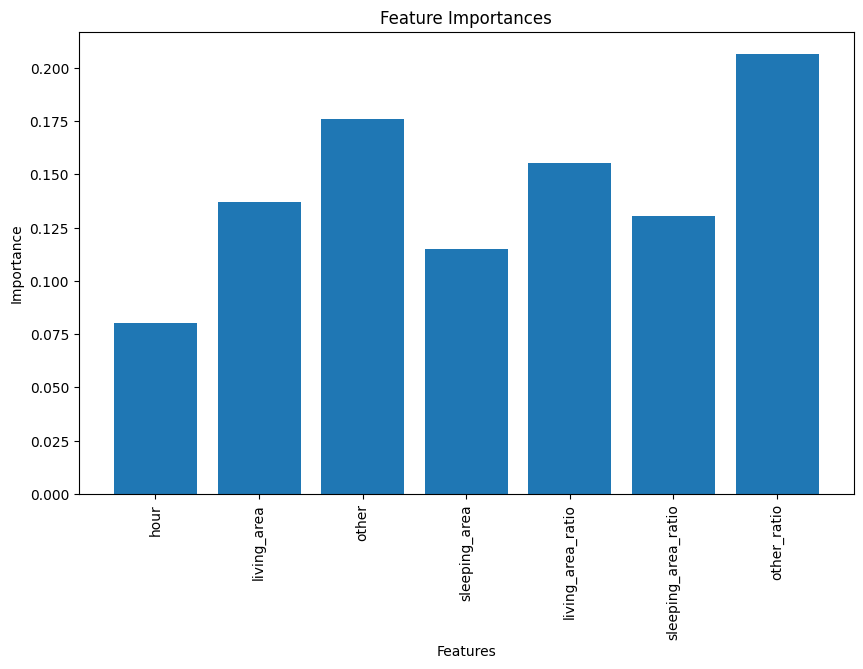

In [129]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [130]:
# Analyze potential biases or limitations
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


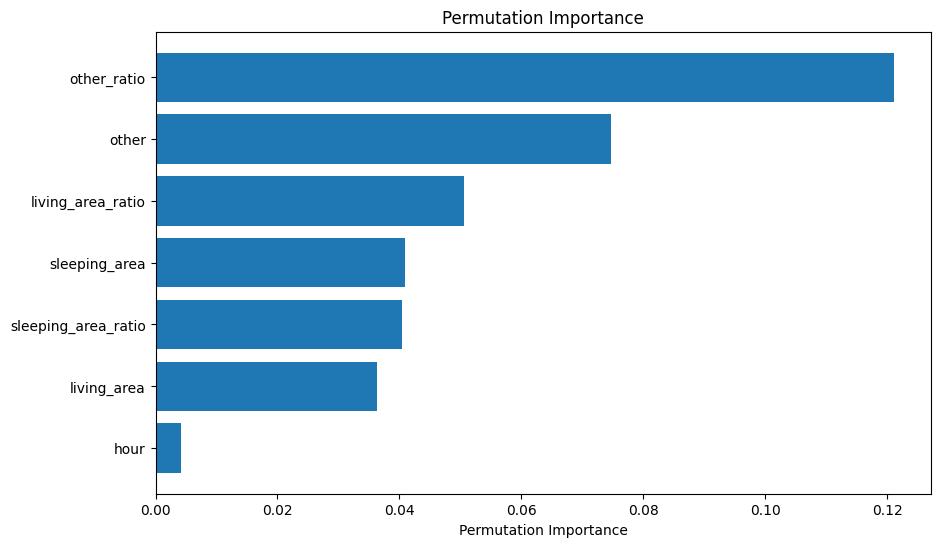

In [131]:
# Plot permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(perm_importance.importances_mean)), np.array(X_train.columns)[sorted_idx], rotation=0)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance')
plt.show()


In [132]:
# Check for class imbalance
print("Class Distributions:")
print(y_train.value_counts())
print(y_test.value_counts())

Class Distributions:
multiple_occupancy
1    610
0    336
Name: count, dtype: int64
multiple_occupancy
1    153
0     84
Name: count, dtype: int64


In [133]:
!pip install onnxmltools

In [134]:
!pip install onnxconverter_common

In [135]:
pip show setuptools

Name: setuptools
Version: 69.5.1
Summary: Easily download, build, install, upgrade, and uninstall Python packages
Home-page: https://github.com/pypa/setuptools
Author: Python Packaging Authority
Author-email: distutils-sig@python.org
License: 
Location: C:\Users\syeda\Desktop\de-ht-Imperial\ML_project\venv\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install skl2onnx

Note: you may need to restart the kernel to use updated packages.


In [138]:
print(X_train)

      hour  living_area  other  sleeping_area  living_area_ratio  \
650     19        224.0   23.0            0.0           0.030201   
977     10        739.0  201.0            0.0           0.045388   
993      2          0.0   14.0           28.0           0.000000   
730      3         11.0    0.0            5.0           0.001166   
275      2         64.0   12.0           75.0           0.012107   
...    ...          ...    ...            ...                ...   
1044     5          0.0   46.0           46.0           0.000000   
1095     8        445.0  259.0           77.0           0.037565   
1130    19        271.0  188.0           15.0           0.024335   
860     13        259.0   89.0           48.0           0.035100   
1126    15        211.0  249.0           29.0           0.018948   

      sleeping_area_ratio  other_ratio  
650              0.000000     0.003101  
977              0.000000     0.012345  
993              0.002701     0.001350  
730              0.

In [139]:
pip install onnx

Note: you may need to restart the kernel to use updated packages.


In [140]:
import pandas as pd
import onnxmltools
import onnxconverter_common
import skl2onnx

# Demonstrate prediction on new data
new_data = {
    'hour': [10, 15, 20],
    'living_area': [2, 1, 0],
    'other': [1, 0, 2],
    'sleeping_area': [0, 1, 3],
    
    'living_area_ratio': [0.5, 0.25, 0.0],  
    'sleeping_area_ratio': [0.0, 0.25, 0.6],
    'other_ratio': [0.25, 0.0, 0.4]
}
new_data = pd.DataFrame(new_data)


In [141]:
predictions = model.predict(new_data)
print("Predictions on New Data:")
print(predictions)

Predictions on New Data:
[0 0 1]


In [142]:
# Convert the model to ONNX format
def convert_dataframe_to_numpy(df):
    """
    Convert a pandas DataFrame to a NumPy array.
    """
    return df.to_numpy()

In [143]:
import numpy as np
from onnxmltools.convert.common.data_types import FloatTensorType


In [144]:
# Determine the input shape from X_train
input_shape = X_train.shape

# Create the input data type
input_data_type = FloatTensorType(input_shape)

In [145]:
import onnx

# Convert the model to ONNX format
onnx_model = onnxmltools.convert_sklearn(
    model,
    initial_types=[('float_input', input_data_type)],
    target_opset=13
)

# Save the ONNX model
onnx.save_model(onnx_model, "random_forest_model.onnx")

In [146]:
# Create an ONNX converter
onnx_converter = onnxmltools.convert_sklearn(
    model,
    initial_types=[('float_input', input_data_type)],
    target_opset=13
)